# Avalanche Forecast: Weather Cleaning

In this notebook I am going to download the weather data and clean it as best I can.

### Import tools

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = (12, 9)

### Import the data 

In [17]:
weather = pd.read_csv("data/MWOBSWeatherData.csv")
weather.head()

,date,temp_max,temp_min,water_equivalent,water_equivalent_trace,snow_fall,snow_fall_trace,snow_depth_6am,snow_depth_6am_trace,wind_speed_sum,sunshine_sum,sunshine_percent,skycover_sum,skycover_avg_sunrisetosunset,prevailing_wind,west_wind_hours,northwest_wind_hours
0,1/2/35,10,-21,0.63,0,2.2,0,0.0,0,2171,0,0,0,0,NW,7,9
1,1/1/35,12,2,2.03,0,11.7,0,0.0,0,1780,0,0,0,0,S,0,6
2,1/3/35,15,-8,0.23,0,1.1,0,0.0,0,1627,0,0,0,0,WNW,0,0
3,1/4/35,15,-35,0.00,1,0.0,1,0.0,0,2231,0,0,0,0,NW,1,21
4,1/5/35,21,-15,0.00,0,0.0,0,0.0,0,1310,0,0,0,0,WSW,0,1


#### Take a quick peek at the data

In [19]:
 weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31335 entries, 0 to 31334
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          31335 non-null  object 
 1   temp_max                      31335 non-null  int64  
 2   temp_min                      31335 non-null  int64  
 3   water_equivalent              31335 non-null  float64
 4   water_equivalent_trace        31335 non-null  int64  
 5   snow_fall                     31335 non-null  float64
 6   snow_fall_trace               31335 non-null  int64  
 7   snow_depth_6am                31335 non-null  float64
 8   snow_depth_6am_trace          31335 non-null  int64  
 9   wind_speed_sum                31335 non-null  int64  
 10  sunshine_sum                  31335 non-null  int64  
 11  sunshine_percent              31335 non-null  int64  
 12  skycover_sum                  31335 non-null  int64  
 13  s

Looks like everything is not empty except for a few of the prevailing wind instances

In [22]:
weather.describe()

,temp_max,temp_min,water_equivalent,water_equivalent_trace,snow_fall,snow_fall_trace,snow_depth_6am,snow_depth_6am_trace,wind_speed_sum,sunshine_sum,sunshine_percent,skycover_sum,skycover_avg_sunrisetosunset,west_wind_hours,northwest_wind_hours
count,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000,31335.000000
mean,34.099761,20.570002,0.241467,0.069571,0.727583,0.070209,4.342033,0.062550,831.769778,223.888240,29.888974,157.392309,6.729344,10.679432,5.531833
std,17.973769,19.943173,0.480781,0.254426,1.964691,0.255503,7.119799,0.242155,414.930801,271.021329,35.798308,75.915221,3.337897,8.492821,6.987072
min,-37.000000,-46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,507.000000,0.000000,0.000000,110.000000,5.000000,2.000000,0.000000
50%,35.000000,22.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,786.000000,77.000000,10.000000,180.000000,8.000000,10.000000,2.000000
75%,49.000000,37.000000,0.280000,0.000000,0.500000,0.000000,6.000000,0.000000,1107.000000,434.000000,58.000000,224.000000,10.000000,18.000000,9.000000
max,72.000000,60.000000,10.820000,1.000000,49.300000,1.000000,50.000000,1.000000,2811.000000,944.000000,109.000000,340.000000,10.000000,24.000000,24.000000


I dont know what water_equivalent, water_equivalent_trace, snow_fall_trace, and some other variables really are but this will be resolved once we have the meta data sheet. 

##### lets make some box plots to search for outliers in the nominal data 

   temp_max  temp_min
0        10       -21
1        12         2
2        15        -8
3        15       -35
4        21       -15


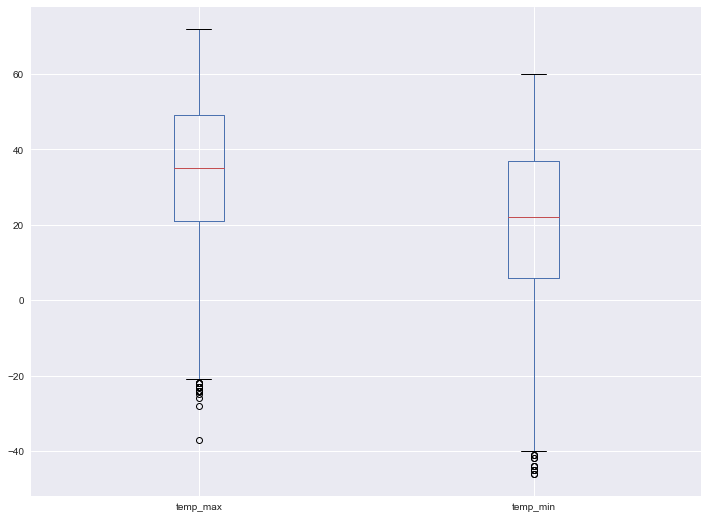

In [59]:
highsLows = weather.iloc[:,1:3]
print(highsLows.head())
ax = highsLows.boxplot()

there are some outlier low temperatures but they are pretty normal for New England

### Focusing on the date column 

In [23]:
print(weather.date)

0          1/2/35
1          1/1/35
2          1/3/35
3          1/4/35
4          1/5/35
           ...   
31330    10/11/20
31331    10/12/20
31332    10/13/20
31333    10/14/20
31334    10/15/20
Name: date, Length: 31335, dtype: object


includes date from 1935 to 2020. all seem to have the form mm/dd/yy and seem to be accurate.

In [27]:
# Extracting each piece of datetime 
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month
weather['day'] = pd.DatetimeIndex(weather['date']).day



In [28]:
weather.head()

,date,temp_max,temp_min,water_equivalent,water_equivalent_trace,snow_fall,snow_fall_trace,snow_depth_6am,snow_depth_6am_trace,wind_speed_sum,sunshine_sum,sunshine_percent,skycover_sum,skycover_avg_sunrisetosunset,prevailing_wind,west_wind_hours,northwest_wind_hours,year,month,day
0,1/2/35,10,-21,0.63,0,2.2,0,0.0,0,2171,0,0,0,0,NW,7,9,2035,1,2
1,1/1/35,12,2,2.03,0,11.7,0,0.0,0,1780,0,0,0,0,S,0,6,2035,1,1
2,1/3/35,15,-8,0.23,0,1.1,0,0.0,0,1627,0,0,0,0,WNW,0,0,2035,1,3
3,1/4/35,15,-35,0.00,1,0.0,1,0.0,0,2231,0,0,0,0,NW,1,21,2035,1,4
4,1/5/35,21,-15,0.00,0,0.0,0,0.0,0,1310,0,0,0,0,WSW,0,1,2035,1,5


In [62]:
weather.date[weather.date == '1/1/00'].index.tolist()

[23741]

Above is the row index of when the date switches from the 1900s to the 2000s 
   

        date  temp_max  temp_min  water_equivalent  water_equivalent_trace  \
0 1935-01-02        10       -21              0.63                       0   
1 1935-01-01        12         2              2.03                       0   
2 1935-01-03        15        -8              0.23                       0   
3 1935-01-04        15       -35              0.00                       1   
4 1935-01-05        21       -15              0.00                       0   

   snow_fall  snow_fall_trace  snow_depth_6am  snow_depth_6am_trace  \
0        2.2                0             0.0                     0   
1       11.7                0             0.0                     0   
2        1.1                0             0.0                     0   
3        0.0                1             0.0                     0   
4        0.0                0             0.0                     0   

   wind_speed_sum  sunshine_sum  sunshine_percent  skycover_sum  \
0            2171             0      

In [92]:
#make the year month day columns in the 1900s
nineteenhundreds = weather.copy().iloc[:23741,:]
nineteenhundreds['date']= pd.to_datetime(nineteenhundreds['date'].str[:-2] + '19' + nineteenhundreds['date'].str[-2:])
nineteenhundreds['year'] = pd.DatetimeIndex(nineteenhundreds['date']).year
nineteenhundreds['month'] = pd.DatetimeIndex(nineteenhundreds['date']).month
nineteenhundreds['day'] = pd.DatetimeIndex(nineteenhundreds['date']).day

#make the year month day columns in the 2000s
twothousands = weather.copy().iloc[23741:,:]
twothousands['date'] = pd.to_datetime(twothousands['date'].str[:-2] + '20' + twothousands['date'].str[-2:])
twothousands['year'] = pd.DatetimeIndex(twothousands['date']).year
twothousands['month'] = pd.DatetimeIndex(twothousands['date']).month
twothousands['day'] = pd.DatetimeIndex(twothousands['date']).day



,date,temp_max,temp_min,water_equivalent,water_equivalent_trace,snow_fall,snow_fall_trace,snow_depth_6am,snow_depth_6am_trace,wind_speed_sum,sunshine_sum,sunshine_percent,skycover_sum,skycover_avg_sunrisetosunset,prevailing_wind,west_wind_hours,northwest_wind_hours,year,month,day
31330,2020-10-11,38,22,0.00,1,0.0,0,0.0,0,782,650,95,61,0,NW,2,11,2020,10,11
31331,2020-10-12,42,35,0.00,0,0.0,0,0.0,0,253,684,100,65,3,S,1,0,2020,10,12
31332,2020-10-13,45,35,1.29,0,0.0,0,0.0,0,686,20,3,187,8,SE,0,4,2020,10,13
31333,2020-10-14,37,25,0.08,0,0.0,0,0.0,0,1084,135,20,159,7,NW,9,15,2020,10,14
31334,2020-10-15,45,31,0.00,0,0.0,0,0.0,0,924,545,81,172,7,SW,6,0,2020,10,15


### now we can combine the data frames 

In [95]:
weather = pd.concat([nineteenhundreds, twothousands])

print(weather.head())

print(weather.tail())

        date  temp_max  temp_min  water_equivalent  water_equivalent_trace  \
0 1935-01-02        10       -21              0.63                       0   
1 1935-01-01        12         2              2.03                       0   
2 1935-01-03        15        -8              0.23                       0   
3 1935-01-04        15       -35              0.00                       1   
4 1935-01-05        21       -15              0.00                       0   

   snow_fall  snow_fall_trace  snow_depth_6am  snow_depth_6am_trace  \
0        2.2                0             0.0                     0   
1       11.7                0             0.0                     0   
2        1.1                0             0.0                     0   
3        0.0                1             0.0                     0   
4        0.0                0             0.0                     0   

   wind_speed_sum  sunshine_sum  sunshine_percent  skycover_sum  \
0            2171             0      